<a href="https://colab.research.google.com/github/SharanIO/Reinforcement-Learning/blob/main/sthiruna_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gymnasium matplotlib numpy optuna

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time

Below is an example of the visualization of the grid world created using matplotlib.

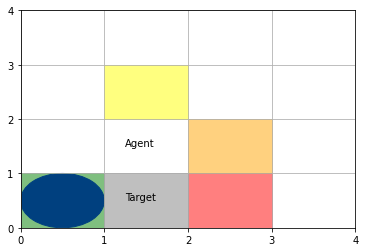

In [3]:
x = np.linspace(0,4,5)
y = np.linspace(0,4,5)
fig = plt.figure()
ax = fig.add_subplot(111)
x1=np.random.randint(3)
y1=np.random.randint(3)
agent = patches.Circle((0.5,0.5),0.5,color ='blue')#agent_pos
plt.annotate("Agent",(x1+0.25,y1+0.5))
x2=np.random.randint(3)
y2=np.random.randint(3)
target = patches.Rectangle((0,0),1, 1,color ='green',alpha = 0.5)#goal_pos
plt.annotate("Target",(x2+0.25,y2+0.5))
reward1 = patches.Rectangle((np.random.randint(3),np.random.randint(3)),1, 1,color ='yellow',alpha = 0.5)#goal_pos
reward2 = patches.Rectangle((np.random.randint(3),np.random.randint(3)),1, 1,color ='red',alpha = 0.5)#goal_pos
reward3 = patches.Rectangle((np.random.randint(3),np.random.randint(3)),1, 1,color ='grey',alpha = 0.5)#goal_pos
reward4 = patches.Rectangle((np.random.randint(3),np.random.randint(3)),1, 1,color ='orange',alpha = 0.5)#goal_pos
ax.set_facecolor("white")
ax.add_patch(agent)
ax.add_patch(target)
ax.add_patch(reward1)
ax.add_patch(reward2)
ax.add_patch(reward3)
ax.add_patch(reward4)

#plt.axis([0,4,0,4])
plt.xticks([0,1,2,3,4])
plt.yticks([0,1,2,3,4])
plt.grid()
plt.show()
plt.pause(1)
plt.close()


In [113]:
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time
import optuna as op
from google.colab import output

A grid world is created using gymnasium. The stochastic environment considers the desired action 90% of the time and considers a random action 10% of the time.

In [131]:
class MyGridWorldEnv(gym.Env):
  metadata = { 'render.modes': [] }
  
  def __init__(self,environment_type):
    self.observation_space = spaces.Discrete(16) # Observation space has 16 states
    self.action_space = spaces.Discrete(4) # Action space has 4 states
    self.max_timesteps = 50 # Number of steps the agent takes

    self.reward_status = [False, False, False, False, False]
    self.timestep = 0 # Initial timestep
    self.agent_pos = [0, 0] # Initial position of the agent
    self.goal_pos = [3, 3] # Position of the target
    self.reward_pos = [[1,1],[2,3],[0,3],[2,0]] #Custom positions of the rewards
    self.obs_all = {"agent": self.agent_pos, "target": self.goal_pos} 
    self.environment_type = environment_type #Deterministic or Stochastic

  def step(self,action):
    if self.environment_type == "deterministic":
      if action == 0:
        self.agent_pos[1] += 1 #up
      if action == 1:
        self.agent_pos[1] -= 1 #down
      if action == 2:
        self.agent_pos[0] += 1 #right
      if action == 3:
        self.agent_pos[0] -= 1 #left

    if self.environment_type == "stochastic":
      print("actual value",action)
      if np.random.random()<0.9:
        if action == 0:
          self.agent_pos[1] += 1 #up
        if action == 1:
          self.agent_pos[1] -= 1 #down
        if action == 2:
          self.agent_pos[0] += 1 #right
        if action == 3:
          self.agent_pos[0] -= 1 #left
      else:
        action = np.random.choice(self.action_space.n)
        print("Change in value",action)
        if action == 0:
          self.agent_pos[1] += 1 #up
        if action == 1:
          self.agent_pos[1] -= 1 #down
        if action == 2:
          self.agent_pos[0] += 1 #right
        if action == 3:
          self.agent_pos[0] -= 1 #left

    self.agent_pos = np.clip(self.agent_pos, 0, 3)
    self.obs_all = {"agent": self.agent_pos, "target": self.goal_pos}
    observation = self.obs_all

    #Add more rewards and penalities
    reward = -1
  
    if np.array_equal(self.agent_pos, self.goal_pos):
      if self.reward_status[0] == False:
        reward = 10 #green
        self.reward_status[0] = True
    if np.array_equal(self.agent_pos, self.reward_pos[0]):
      if self.reward_status[1] == False:
        reward = 5 #yellow
        print("collected reward of ", reward, "points")
      self.reward_status[1] = True
    if np.array_equal(self.agent_pos, self.reward_pos[1]):
      if self.reward_status[2] == False:
        reward = -3 #red
        self.reward_status[2] = True

    if np.array_equal(self.agent_pos, self.reward_pos[2]):
      if self.reward_status[3] == False:
        reward = 2 #grey
        self.reward_status[3] = True
  
    if np.array_equal(self.agent_pos, self.reward_pos[3]):
      if self.reward_status[4] == False:
        reward = 3 #orange
        self.reward_status[4] = True
    
    
    self.timestep += 1
    print("time_step", self.timestep)
    if (self.timestep >= self.max_timesteps) or np.array_equal(self.agent_pos, self.goal_pos):
      terminated = True 
    else:
      terminated = False
    #terminated = True if (self.timestep >= self.max_timesteps) or (self.agent_pos==self.goal_pos) else False #terminates at after max timesteps
    truncated = True if np.all((self.agent_pos >=0 ) & (self.agent_pos <= 3)) else False #Allows the agent to not exit the environment boundary

    info = {}
        
    return observation, reward, terminated, truncated, info

  def reset(self):
    self.reward_status = [False, False, False, False, False]
    self.timestep = 0
    self.agent_pos = [0, 0]
    self.goal_pos = [3, 3]
    self.obs_all = {"agent": self.agent_pos, "target": self.goal_pos}
    observation = self.obs_all

    info = {}

    return observation, info

  def render(self,obs):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    pos = obs["agent"]
    xpos = pos[0]+0.5
    ypos = pos[1]+0.5
    
    target = patches.Rectangle(tuple(obs["target"]),1, 1,color ='green',alpha=0.5)#goal_pos
    reward1 = patches.Rectangle(tuple(self.reward_pos[0]),1, 1,color ='yellow',alpha=0.5)#5_pos
    reward2 = patches.Rectangle(tuple(self.reward_pos[1]),1, 1,color ='red',alpha=0.5)#-3_pos
    reward3 = patches.Rectangle(tuple(self.reward_pos[2]),1, 1,color ='grey',alpha=0.5)#2_pos
    reward4 = patches.Rectangle(tuple(self.reward_pos[3]),1, 1,color ='orange',alpha=0.5)#1_pos
    robot = patches.Circle((xpos,ypos),0.5,color ='blue')#agent_pos
    ax.set_facecolor("white")
    ax.add_patch(robot)
    ax.add_patch(target)
    ax.add_patch(reward1)
    ax.add_patch(reward2)
    ax.add_patch(reward3)
    ax.add_patch(reward4)

    #plt.axis([0,4,0,4])
    plt.xticks([0,1,2,3,4])
    plt.yticks([0,1,2,3,4])
    plt.grid()
    plt.show()
    plt.pause(0.1)

A Random agent is created whose desired actions are random

In [71]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, obs):
    return np.random.choice(self.action_space.n)

In [72]:
from google.colab import output

The random agent is implemented in the deterministic environment.

3
time_step 35
{'agent': array([0, 3]), 'target': [3, 3]}
reward 0
total reward 7


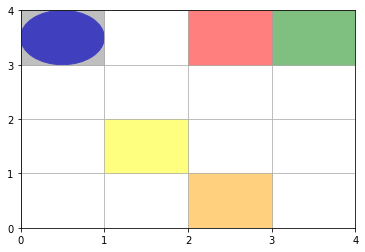

KeyboardInterrupt: ignored

In [73]:
env = MyGridWorldEnv("deterministic")
agent = RandomAgent(env)

obs, info = env.reset()
env.render(obs)
terminated, truncated = False, False
total_reward = 0
while not terminated:
  action = agent.step(obs)
  print(action)
  obs, reward, terminated, truncated, info = env.step(action)
  total_reward = total_reward + reward
  print(obs)
  print("reward",reward)
  print("total reward",total_reward)
  env.render(obs)
  output.clear()




The random is agent is implemented in the stochastic environment.

In [ ]:
env = MyGridWorldEnv("stochastic")
agent = RandomAgent(env)

obs, info = env.reset()
env.render(obs)
terminated, truncated = False, False
total_reward = 0
while not terminated:
  action = agent.step(obs)
  print(action)
  obs, reward, terminated, truncated, info = env.step(action)
  total_reward = total_reward + reward
  print(obs)
  print("reward",reward)
  print("total_reward",total_reward)
  env.render(obs)

# **Initializing the Environment** 

In [140]:
env = MyGridWorldEnv("deterministic")
n_observations = env.observation_space.n
n_actions = env.action_space.n

**Hyperparameters**

In [151]:
n_episodes = 1000
epsilon = 1
max_epsilon = 1
epsilon_decay_rate = 0.008
min_epsilon = 0.01
gamma = 0.8
alpha = 0.2

In [152]:
Q_table_deter_q = np.zeros((n_observations,n_actions)) #Q_table_deterministic
total_rewards = list()                         #Total reward
time_steps_episode = list()                    #Total time steps
epsilon_decay = list()                         #Epsilon decay
matrix = np.arange(16).reshape((4, 4))         #Matrix for numbering each grid as a numeric state instead of taking it as co-ordinates
matrix = matrix.T

In [143]:
def Q_learning(env,n_episodes,epsilon,max_epsilon,epsilon_decay_rate,epsilon_decay,gamma,aplha,Q_table):
  for e in range(n_episodes):
      observation_reset,info = env.reset()


      ind = observation_reset['agent']
      current_state = matrix[ind[0]][ind[1]]
      terminated, truncated = False, False 

      total_episode_reward = 0

      i = 0
      print(".......episode.........",e)
      while not terminated:


          rand_num = np.random.random()
          if epsilon > rand_num: # explore
            print("exploring")
            action = np.random.randint(4)
          else: # exploit
            print("greedy")
            action = np.argmax(Q_table[current_state,:])


          print("action",action)

          observation_state, reward, terminated, truncated, info = env.step(action)

          print(observation_state)

          ind = observation_state['agent']
          next_state = matrix[ind[0],ind[1]]
          print("state",next_state)

          Q_table[current_state, action] = (1-alpha) * Q_table[current_state, action] +alpha*(reward + gamma*max(Q_table[next_state,:]))

          total_episode_reward = total_episode_reward + reward
          print("reward",total_episode_reward)
          print("maximum reward:", 18)
          
          current_state = next_state
          
          i = i+1
      
      time_steps_episode.append(i-1)
      epsilon = max(min_epsilon, (max_epsilon - min_epsilon)*np.exp(-epsilon_decay_rate*e))
      # epsilon = max(min_exploration_proba, 0.995*epsilon)
      epsilon_decay.append(epsilon)
      print("probability",epsilon)
      total_rewards.append(total_episode_reward)
  

In [178]:
def sarsa(env,n_episodes,epsilon,max_epsilon,epsilon_decay_rate,epsilon_decay,gamma,alpha,Q_table):
  for e in range(n_episodes):
      observation_reset,info = env.reset()
      ind = observation_reset['agent']
      current_state = matrix[ind[0]][ind[1]]
      # print(current_state)
      rand_num = np.random.random()
      if epsilon > rand_num: # explore
        print("exploring")
        prev_action = np.random.randint(4)
      else: # exploit
        print("greedy")
        prev_action = np.argmax(Q_table[current_state,:])

      terminated, truncated = False, False
                                  
      total_episode_reward = 0
      i = 0
      print(".......episode.........",e)
      while not terminated:
          observation_state, reward, terminated, truncated, info = env.step(prev_action)
          print(observation_state)
          ind = observation_state['agent']
          next_state = matrix[ind[0],ind[1]]
          print("state",next_state)
          rand_num = np.random.random()
          if epsilon > rand_num: # explore
            print("exploring")
            action = np.random.randint(4)
          else: # exploit
            print("greedy")
            action = np.argmax(Q_table[next_state,:])
          print("action",action)

          # observation_state, reward, terminated, truncated, info = env.step(action)
          # print(observation_state)
          # ind = observation_state['agent']
          # next_state = matrix[ind[0],ind[1]]
          # print("state",next_state)
          
          Q_table[current_state, prev_action] = (1-alpha) * Q_table[current_state, prev_action] +alpha*(reward + gamma*(Q_table[next_state,action]))
          total_episode_reward = total_episode_reward + reward
          print("reward",total_episode_reward)
          print("maximum reward:", 18)
          
          current_state = next_state
          prev_action = action
          i = i+1
      
      time_steps_episode.append(i-1)
      #epsilon = max(min_epsilon, (max_epsilon - min_epsilon)*np.exp(-epsilon_decay_rate*e))
      epsilon = max(min_epsilon, 0.995*epsilon)
      epsilon_decay.append(epsilon)
      print("probability",epsilon)
      total_rewards.append(total_episode_reward)

In [153]:
Q_learning(env,n_episodes,epsilon,max_epsilon,epsilon_decay_rate,epsilon_decay,gamma,alpha,Q_table_deter_q)

Streaming output truncated to the last 5000 lines.
greedy
action 2
collected reward of  5 points
time_step 2
{'agent': array([1, 1]), 'target': [3, 3]}
state 5
reward 4
maximum reward: 18
greedy
action 1
time_step 3
{'agent': array([1, 0]), 'target': [3, 3]}
state 1
reward 3
maximum reward: 18
greedy
action 2
time_step 4
{'agent': array([2, 0]), 'target': [3, 3]}
state 2
reward 6
maximum reward: 18
greedy
action 2
time_step 5
{'agent': array([3, 0]), 'target': [3, 3]}
state 3
reward 5
maximum reward: 18
greedy
action 0
time_step 6
{'agent': array([3, 1]), 'target': [3, 3]}
state 7
reward 4
maximum reward: 18
greedy
action 0
time_step 7
{'agent': array([3, 2]), 'target': [3, 3]}
state 11
reward 3
maximum reward: 18
greedy
action 0
time_step 8
{'agent': array([3, 3]), 'target': [3, 3]}
state 15
reward 13
maximum reward: 18
probability 0.01
.......episode......... 918
greedy
action 0
time_step 1
{'agent': array([0, 1]), 'target': [3, 3]}
state 4
reward -1
maximum reward: 18
greedy
action 

(array([[ 4.90422566,  1.84955191,  2.77740753,  1.80542704],
        [ 2.80771884,  2.90236066,  5.144     ,  1.89161337],
        [ 2.52514858,  1.03738971,  2.68      ,  2.65243909],
        [ 4.6       ,  2.45780942,  2.62591173,  1.18961346],
        [ 1.68416784,  2.28588919,  7.47351368,  3.67335939],
        [ 2.68      ,  3.1152    ,  2.66506648,  3.06602811],
        [ 4.49013811,  2.84509711,  4.59998214,  2.50128363],
        [ 7.        ,  2.65305795,  4.53726354,  2.58920713],
        [ 1.42934842,  4.30865973,  2.67553523,  0.77832619],
        [ 2.23774575,  1.15822467,  4.6       ,  1.09853263],
        [ 4.94552396,  2.66589777,  7.        ,  2.6562384 ],
        [10.        ,  4.59651242,  6.99945469,  4.59892335],
        [-1.21517031,  0.74352217, -0.34082083, -1.05006749],
        [ 0.38927828,  2.61275933,  4.71848811,  1.09764307],
        [ 3.95812319,  3.07108844,  9.99207718,  0.1211842 ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]]), 7)

In [154]:
print(Q_table_deter_q)

[[ 4.90422566  1.84955191  2.77740753  1.80542704]
 [ 2.80771884  2.90236066  5.144       1.89161337]
 [ 2.52514858  1.03738971  2.68        2.65243909]
 [ 4.6         2.45780942  2.62591173  1.18961346]
 [ 1.68416784  2.28588919  7.47351368  3.67335939]
 [ 2.68        3.1152      2.66506648  3.06602811]
 [ 4.49013811  2.84509711  4.59998214  2.50128363]
 [ 7.          2.65305795  4.53726354  2.58920713]
 [ 1.42934842  4.30865973  2.67553523  0.77832619]
 [ 2.23774575  1.15822467  4.6         1.09853263]
 [ 4.94552396  2.66589777  7.          2.6562384 ]
 [10.          4.59651242  6.99945469  4.59892335]
 [-1.21517031  0.74352217 -0.34082083 -1.05006749]
 [ 0.38927828  2.61275933  4.71848811  1.09764307]
 [ 3.95812319  3.07108844  9.99207718  0.1211842 ]
 [ 0.          0.          0.          0.        ]]


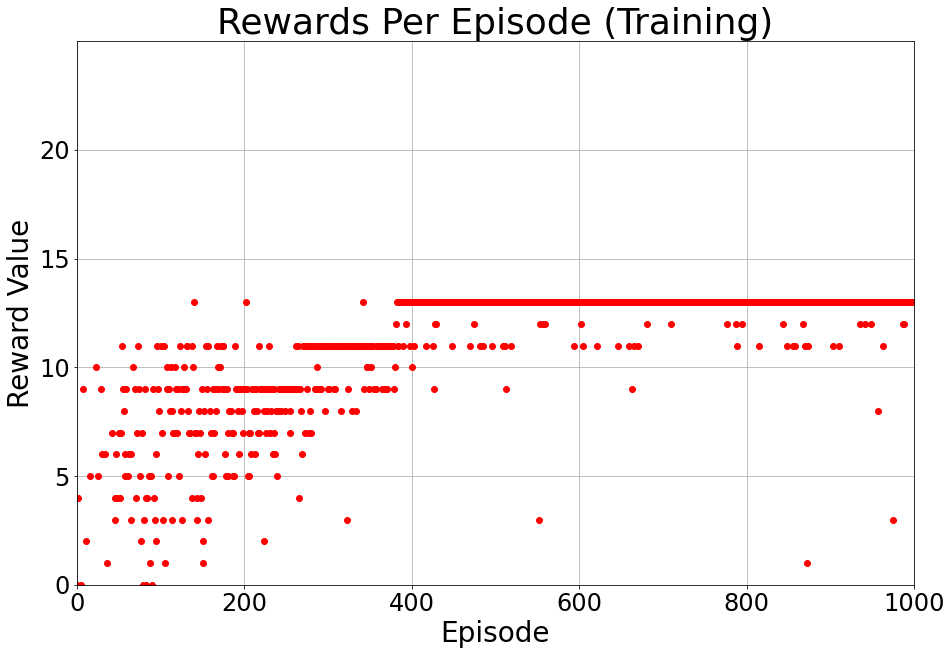

In [155]:
plt.figure(figsize=(15, 10))
plt.plot(total_rewards,'ro')
plt.xlabel('Episode', fontsize=28)
plt.ylabel('Reward Value', fontsize=28)
plt.title('Rewards Per Episode (Training)', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks([0,5,10,15,20], fontsize=24)
plt.ylim(ymin=0, ymax=25)
plt.xlim(xmin=0, xmax=1000)
plt.grid()
plt.show()

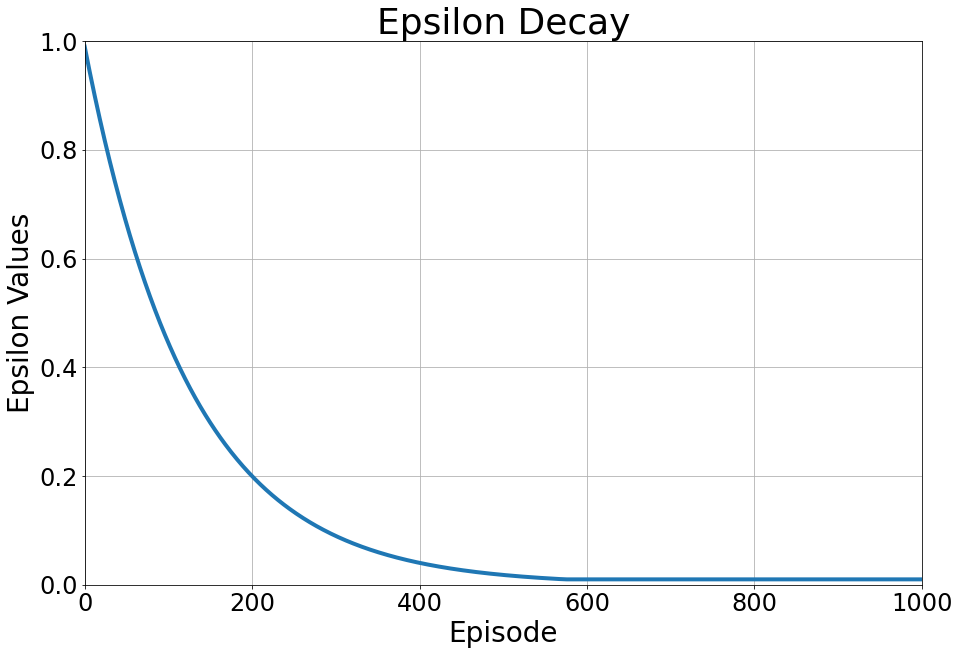

In [156]:
plt.figure(figsize=(15, 10))
plt.plot(epsilon_decay, linewidth=4)
plt.xlabel('Episode', fontsize=28)
plt.ylabel('Epsilon Values', fontsize=28)
plt.title('Epsilon Decay', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=1000)
plt.grid()
plt.show()

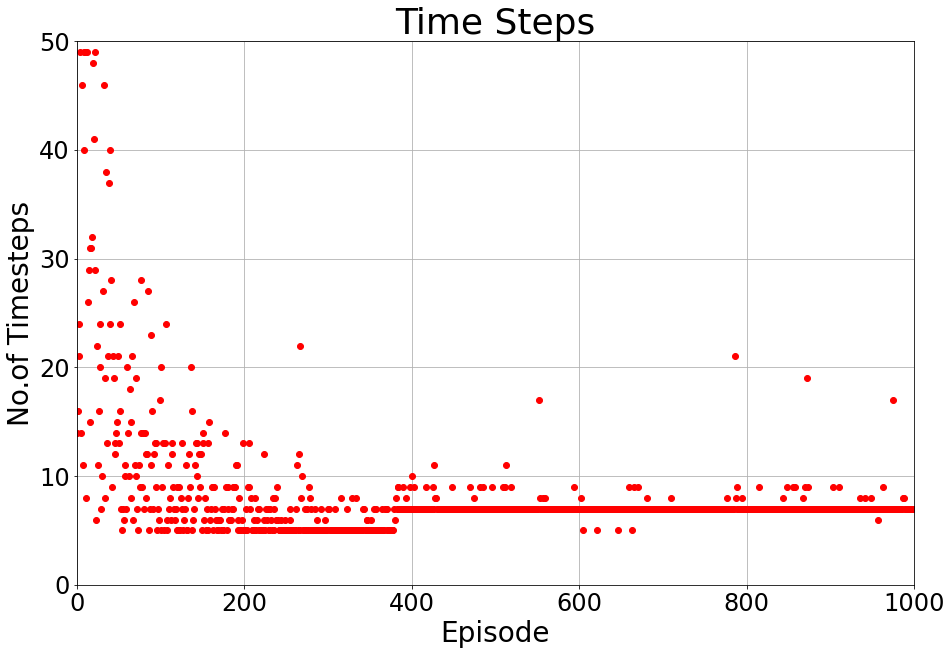

In [157]:
plt.figure(figsize=(15, 10))
plt.plot(time_steps_episode, 'ro')
plt.xlabel('Episode', fontsize=28)
plt.ylabel('No.of Timesteps', fontsize=28)
plt.title('Time Steps', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(ymin=0, ymax=50)
plt.xlim(xmin=0, xmax=1000)
plt.grid()
plt.show()

In [158]:
for e in range(10):
  observation_reset,info = env.reset()


  ind = observation_reset['agent']
  current_state = matrix[ind[0]][ind[1]]
  terminated, truncated = False, False 
  env.render(observation_reset)
  total_episode_reward = 0
  output.clear()
  i = 0
  print(".......episode.........",e)
  while not terminated:
    action = np.argmax(Q_table_deter_q[current_state,:])
    
    observation_state, reward, terminated, truncated, info = env.step(action)
    
    ind = observation_state['agent']
    next_state = matrix[ind[0],ind[1]]
    env.render(observation_state)
    current_state = next_state
    plt.pause(0.5)
    output.clear()

time_step 8


KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>

# **SARSA**

**Hyperparameters**

In [203]:
n_episodes = 1000
epsilon = 1
max_epsilon = 1
epsilon_decay_rate = 0.0075
min_epsilon = 0.01
gamma = 0.8
alpha = 0.2

In [204]:
Q_table_deter_sarsa = np.zeros((n_observations,n_actions)) #Q_table
total_rewards = list()                         #Total reward
time_steps_episode = list()                    #Total time steps
epsilon_decay = list()                         #Epsilon decay
matrix = np.arange(16).reshape((4, 4))         #Matrix for numbering each grid as a numeric state instead of taking it as co-ordinates
matrix = matrix.T

In [205]:
sarsa(env,n_episodes,epsilon,max_epsilon,epsilon_decay_rate,epsilon_decay,gamma,alpha,Q_table_deter_sarsa)

Streaming output truncated to the last 5000 lines.
maximum reward: 18
time_step 3
{'agent': array([2, 1]), 'target': [3, 3]}
state 6
greedy
action 0
reward 3
maximum reward: 18
time_step 4
{'agent': array([2, 2]), 'target': [3, 3]}
state 10
greedy
action 2
reward 2
maximum reward: 18
time_step 5
{'agent': array([3, 2]), 'target': [3, 3]}
state 11
greedy
action 0
reward 1
maximum reward: 18
time_step 6
{'agent': array([3, 3]), 'target': [3, 3]}
state 15
greedy
action 0
reward 11
maximum reward: 18
probability 0.01137656378004644
greedy
.......episode......... 893
time_step 1
{'agent': array([0, 1]), 'target': [3, 3]}
state 4
greedy
action 2
reward -1
maximum reward: 18
collected reward of  5 points
time_step 2
{'agent': array([1, 1]), 'target': [3, 3]}
state 5
greedy
action 2
reward 4
maximum reward: 18
time_step 3
{'agent': array([2, 1]), 'target': [3, 3]}
state 6
greedy
action 0
reward 3
maximum reward: 18
time_step 4
{'agent': array([2, 2]), 'target': [3, 3]}
state 10
greedy
action 2

In [206]:
print(Q_table_deter_sarsa)

[[ 4.35883754e+00  1.17903341e+00  2.17827745e+00  1.33397620e+00]
 [ 1.78234308e+00  3.17038057e-02  4.55449789e+00 -9.04156956e-01]
 [ 2.43592713e+00 -9.60502411e-01 -2.32140266e+00  2.76943745e-01]
 [ 1.20043671e+00 -2.44637429e+00 -1.87893790e+00 -2.45901461e+00]
 [ 1.30048881e+00  1.41091611e+00  7.02437258e+00  1.24713847e+00]
 [ 1.53804049e+00  1.70039868e+00  2.48087943e+00  1.83916992e+00]
 [ 4.40090832e+00  1.37700347e+00  3.46950482e+00  2.49240531e+00]
 [ 6.96920348e+00 -1.46288486e+00  1.36350767e+00 -1.02175743e+00]
 [ 3.43274167e+00 -2.19163987e+00 -2.30466737e+00 -1.70069110e+00]
 [ 1.68013538e+00  9.44779535e-02  3.85227004e+00 -9.10918604e-01]
 [ 4.89400597e+00  1.48521484e+00  6.90950509e+00  1.88897195e+00]
 [ 1.00000000e+01  3.64634461e+00  6.77372049e+00  3.22186451e+00]
 [-1.43114613e+00 -1.25323774e+00  2.24850802e+00 -2.39517511e+00]
 [ 1.41616988e+00 -2.53188073e+00  4.59666704e+00  5.70771072e-04]
 [ 5.75423086e+00  2.41349578e+00  1.00000000e+01 -5.14699817e

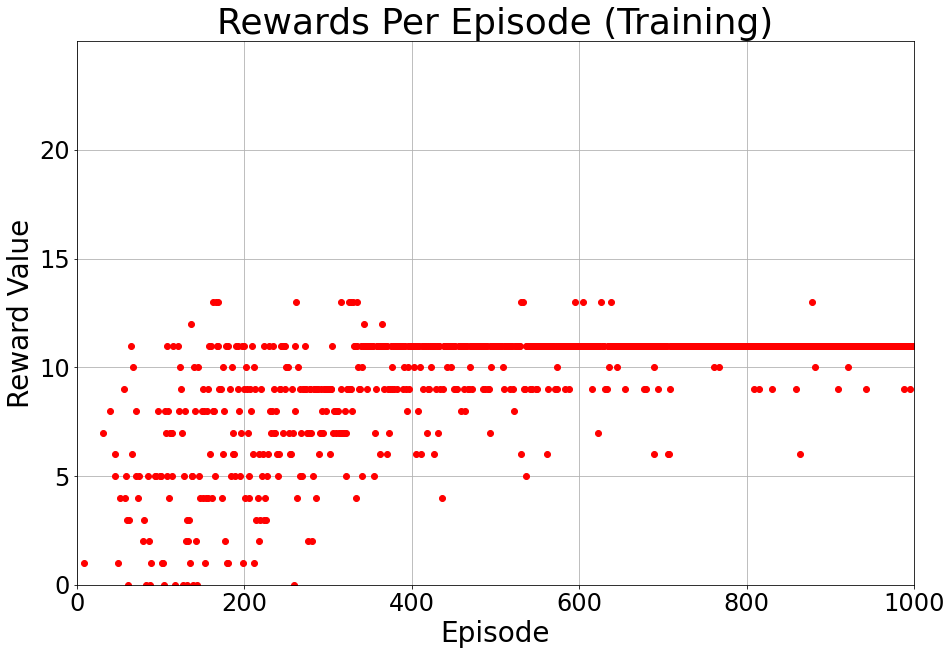

In [207]:
plt.figure(figsize=(15, 10))
plt.plot(total_rewards,'ro')
plt.xlabel('Episode', fontsize=28)
plt.ylabel('Reward Value', fontsize=28)
plt.title('Rewards Per Episode (Training)', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks([0,5,10,15,20], fontsize=24)
plt.ylim(ymin=0, ymax=25)
plt.xlim(xmin=0, xmax=1000)
plt.grid()
plt.show()

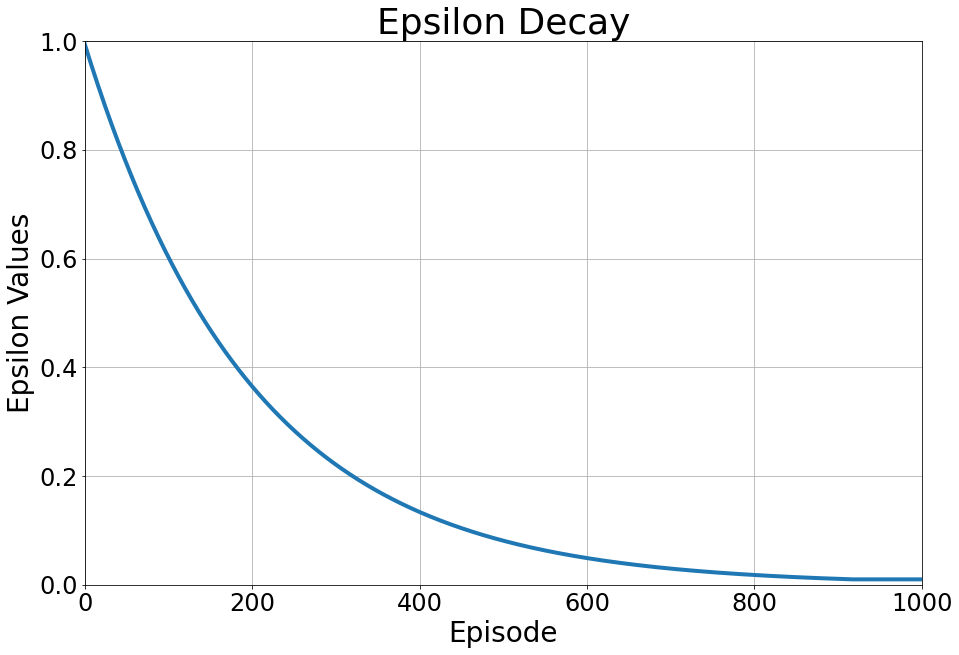

In [208]:
plt.figure(figsize=(15, 10))
plt.plot(epsilon_decay, linewidth=4)
plt.xlabel('Episode', fontsize=28)
plt.ylabel('Epsilon Values', fontsize=28)
plt.title('Epsilon Decay', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=1000)
plt.grid()
plt.show()

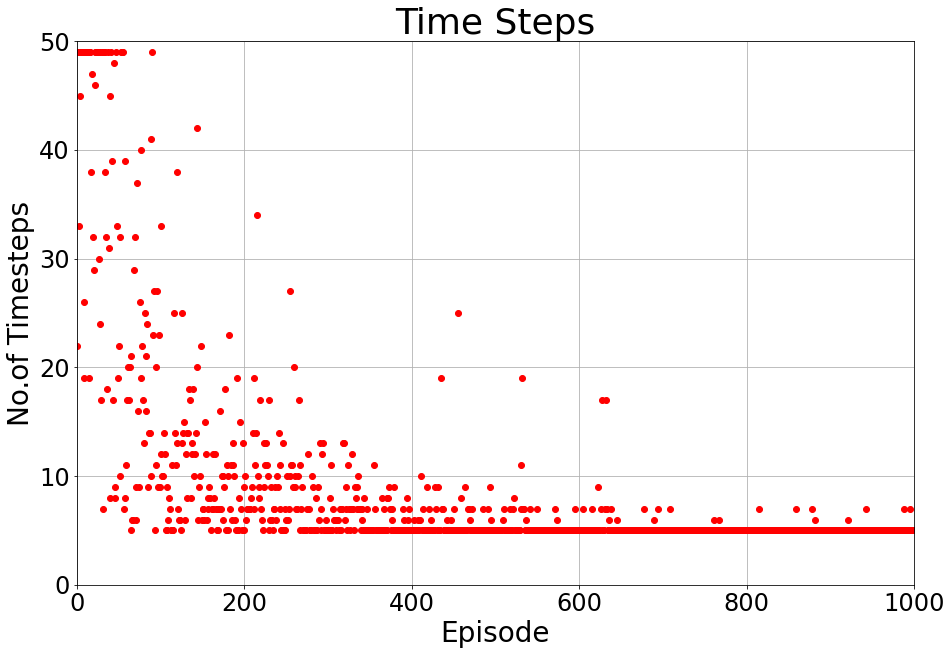

In [209]:
plt.figure(figsize=(15, 10))
plt.plot(time_steps_episode, 'ro')
plt.xlabel('Episode', fontsize=28)
plt.ylabel('No.of Timesteps', fontsize=28)
plt.title('Time Steps', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(ymin=0, ymax=50)
plt.xlim(xmin=0, xmax=1000)
plt.grid()
plt.show()

time_step 3


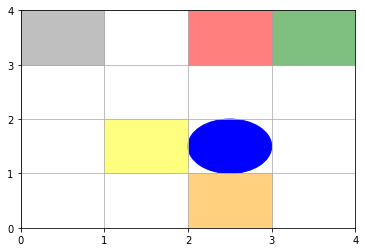

KeyboardInterrupt: ignored

In [202]:
for e in range(10):
  observation_reset,info = env.reset()


  ind = observation_reset['agent']
  current_state = matrix[ind[0]][ind[1]]
  terminated, truncated = False, False 
  env.render(observation_reset)
  total_episode_reward = 0
  output.clear()
  i = 0
  print(".......episode.........",e)
  while not terminated:
    action = np.argmax(Q_table_deter_sarsa[current_state,:])
    
    observation_state, reward, terminated, truncated, info = env.step(action)
    
    ind = observation_state['agent']
    next_state = matrix[ind[0],ind[1]]
    env.render(observation_state)
    current_state = next_state
    plt.pause(0.5)
    output.clear()

# **Stochastic Environment**

In [252]:
env = MyGridWorldEnv("stochastic")
n_observations = env.observation_space.n
n_actions = env.action_space.n

In [229]:
n_episodes = 1000
epsilon = 1
max_epsilon = 1
epsilon_decay_rate = 0.008
min_epsilon = 0.01
gamma = 0.95
alpha = 0.2

In [230]:
Q_table_stoch_q = np.zeros((n_observations,n_actions)) #Q_table
total_rewards = list()                         #Total reward
time_steps_episode = list()                    #Total time steps
epsilon_decay = list()                         #Epsilon decay
matrix = np.arange(16).reshape((4, 4))         #Matrix for numbering each grid as a numeric state instead of taking it as co-ordinates
matrix = matrix.T

In [227]:
def Q_learning(env,n_episodes,epsilon,max_epsilon,epsilon_decay_rate,epsilon_decay,gamma,alpha,Q_table):
  for e in range(n_episodes):
      observation_reset,info = env.reset()
      ind = observation_reset['agent']
      current_state = matrix[ind[0]][ind[1]]
      # print(current_state)
      # rand_num = np.random.random()
      # if epsilon > rand_num: # explore
      #   print("exploring")
      #   prev_action = np.random.randint(4)
      # else: # exploit
      #   print("greedy")
      #   prev_action = np.argmax(Q_table[current_state,:])

      terminated, truncated = False, False
                                  
      total_episode_reward = 0
      i = 0
      print(".......episode.........",e)
      while not terminated:
          rand_num = np.random.random()
          if epsilon > rand_num: # explore
            print("exploring")
            action = np.random.randint(4)
          else: # exploit
            print("greedy")
            action = np.argmax(Q_table[current_state,:])
          print("action",action)

          observation_state, reward, terminated, truncated, info = env.step(action)
          print(observation_state)
          ind = observation_state['agent']
          next_state = matrix[ind[0],ind[1]]
          print("state",next_state)
          
          Q_table[current_state, action] = (1-alpha) * Q_table[current_state, action] +alpha*(reward + gamma*max(Q_table[next_state,:]))
          # Q_table[current_state, action] = (1-lamda) * Q_table[current_state, action] +lambda*(reward + gamma*(Q_table[next_state,prev_action]))
          total_episode_reward = total_episode_reward + reward
          print("reward",total_episode_reward)
          print("maximum reward:", 18)
          
          current_state = next_state
          
          i = i+1
      
      time_steps_episode.append(i-1)
      epsilon = max(min_epsilon, (max_epsilon - min_epsilon)*np.exp(-epsilon_decay_rate*e))
      # epsilon = max(min_exploration_proba, 0.995*epsilon)
      epsilon_decay.append(epsilon)
      print("probability",epsilon)
      total_rewards.append(total_episode_reward)

In [260]:
def sarsa(env,n_episodes,epsilon,max_epsilon,epsilon_decay_rate,epsilon_decay,gamma,alpha,Q_table):
  for e in range(n_episodes):
      observation_reset,info = env.reset()
      ind = observation_reset['agent']
      current_state = matrix[ind[0]][ind[1]]
      # print(current_state)
      rand_num = np.random.random()
      if epsilon > rand_num: # explore
        print("exploring")
        prev_action = np.random.randint(4)
      else: # exploit
        print("greedy")
        prev_action = np.argmax(Q_table[current_state,:])

      terminated, truncated = False, False
                                  
      total_episode_reward = 0
      i = 0
      print(".......episode.........",e)
      while not terminated:
          observation_state, reward, terminated, truncated, info = env.step(prev_action)
          print(observation_state)
          ind = observation_state['agent']
          next_state = matrix[ind[0],ind[1]]
          print("state",next_state)
          rand_num = np.random.random()
          if epsilon > rand_num: # explore
            print("exploring")
            action = np.random.randint(4)
          else: # exploit
            print("greedy")
            action = np.argmax(Q_table[next_state,:])
          print("action",action)

          # observation_state, reward, terminated, truncated, info = env.step(action)
          # print(observation_state)
          # ind = observation_state['agent']
          # next_state = matrix[ind[0],ind[1]]
          # print("state",next_state)
          
          Q_table[current_state, prev_action] = (1-alpha) * Q_table[current_state, prev_action] +alpha*(reward + gamma*(Q_table[next_state,action]))
          total_episode_reward = total_episode_reward + reward
          print("reward",total_episode_reward)
          print("maximum reward:", 18)
          
          current_state = next_state
          prev_action = action
          i = i+1
      
      time_steps_episode.append(i-1)
      #epsilon = max(min_epsilon, (max_epsilon - min_epsilon)*np.exp(-epsilon_decay_rate*e))
      epsilon = max(min_epsilon, 0.995*epsilon)
      epsilon_decay.append(epsilon)
      print("probability",epsilon)
      total_rewards.append(total_episode_reward)

In [231]:
Q_learning(env,n_episodes,epsilon,max_epsilon,epsilon_decay_rate,epsilon_decay,gamma,alpha,Q_table_stoch_q)

Streaming output truncated to the last 5000 lines.
time_step 8
{'agent': array([3, 2]), 'target': [3, 3]}
state 11
reward -2
maximum reward: 18
greedy
action 0
actual value 0
time_step 9
{'agent': array([3, 3]), 'target': [3, 3]}
state 15
reward 8
maximum reward: 18
probability 0.01
.......episode......... 910
greedy
action 0
actual value 0
time_step 1
{'agent': array([0, 1]), 'target': [3, 3]}
state 4
reward -1
maximum reward: 18
greedy
action 2
actual value 2
collected reward of  5 points
time_step 2
{'agent': array([1, 1]), 'target': [3, 3]}
state 5
reward 4
maximum reward: 18
greedy
action 0
actual value 0
time_step 3
{'agent': array([1, 2]), 'target': [3, 3]}
state 9
reward 3
maximum reward: 18
greedy
action 2
actual value 2
time_step 4
{'agent': array([2, 2]), 'target': [3, 3]}
state 10
reward 2
maximum reward: 18
greedy
action 2
actual value 2
time_step 5
{'agent': array([3, 2]), 'target': [3, 3]}
state 11
reward 1
maximum reward: 18
greedy
action 0
actual value 0
time_step 6
{'

In [232]:
print(Q_table_stoch_q)

[[ 8.26149559  5.59060243  5.56211693  4.45370539]
 [ 4.66654156  4.81786099  7.54852673  4.6774012 ]
 [ 4.75696912  4.14964587  5.12213635  4.62707866]
 [ 6.52216493  2.41036772  4.31281308  3.87834169]
 [ 4.74430428  5.372196   10.01015245  6.07185191]
 [ 5.34588699  4.86085283  4.92432503  4.8130071 ]
 [ 6.50556169  5.92721798  5.87266149  5.56409349]
 [ 8.07542901  5.30405692  6.7310404   5.90817674]
 [ 6.0732925   3.78234519  3.93725475  4.88901927]
 [ 4.87050843  4.68347232  6.61673725  2.87709018]
 [ 6.37580709  5.18972402  8.06759951  4.27744808]
 [ 9.82615401  6.82973669  8.14556119  6.99344498]
 [ 3.07716614  1.85560949  4.59216589  2.5107321 ]
 [ 4.92543028  4.81429881  5.95268305  4.26423188]
 [ 6.78973778  5.85012256  9.91982928  5.1847389 ]
 [ 0.          0.          0.          0.        ]]


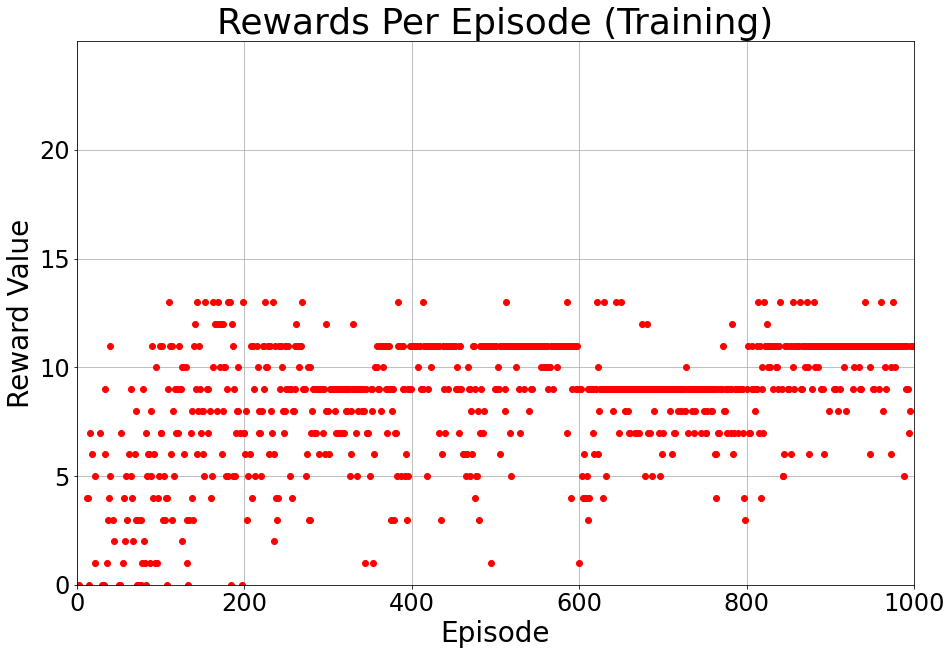

In [233]:
plt.figure(figsize=(15, 10))
plt.plot(total_rewards,'ro')
plt.xlabel('Episode', fontsize=28)
plt.ylabel('Reward Value', fontsize=28)
plt.title('Rewards Per Episode (Training)', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks([0,5,10,15,20], fontsize=24)
plt.ylim(ymin=0, ymax=25)
plt.xlim(xmin=0, xmax=1000)
plt.grid()
plt.show()

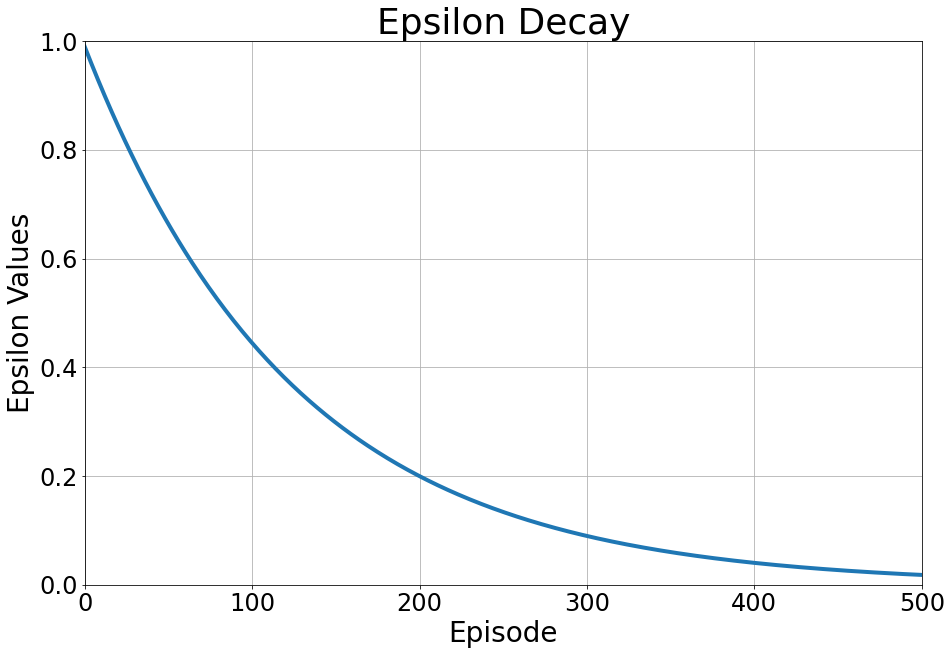

In [234]:
plt.figure(figsize=(15, 10))
plt.plot(epsilon_decay, linewidth=4)
plt.xlabel('Episode', fontsize=28)
plt.ylabel('Epsilon Values', fontsize=28)
plt.title('Epsilon Decay', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=500)
plt.grid()
plt.show()

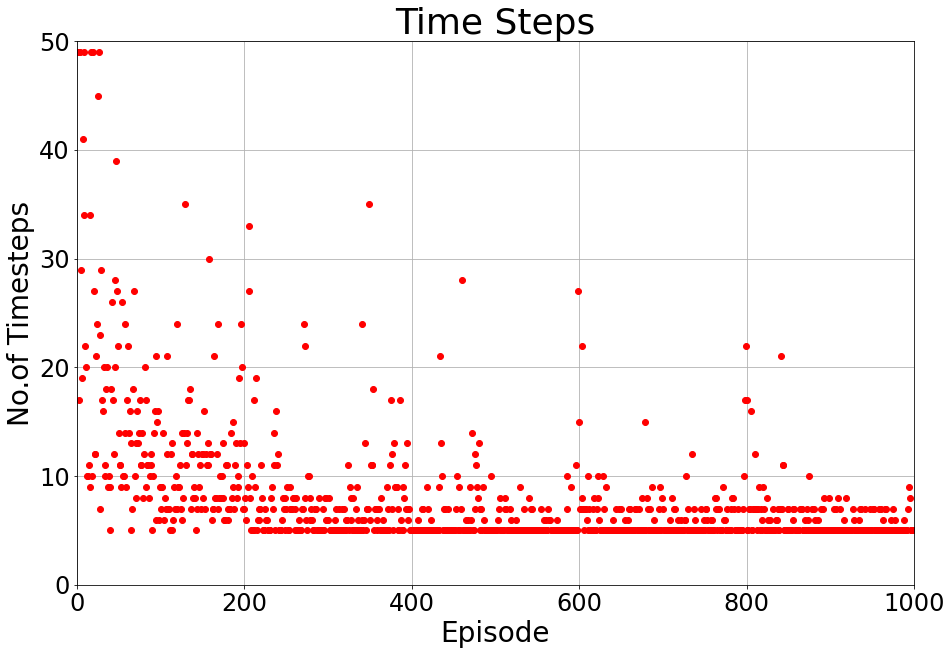

In [235]:
plt.figure(figsize=(15, 10))
plt.plot(time_steps_episode, 'ro')
plt.xlabel('Episode', fontsize=28)
plt.ylabel('No.of Timesteps', fontsize=28)
plt.title('Time Steps', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(ymin=0, ymax=50)
plt.xlim(xmin=0, xmax=1000)
plt.grid()
plt.show()

In [236]:
for e in range(10):
  observation_reset,info = env.reset()


  ind = observation_reset['agent']
  current_state = matrix[ind[0]][ind[1]]
  terminated, truncated = False, False 
  env.render(observation_reset)
  total_episode_reward = 0
  output.clear()
  i = 0
  print(".......episode.........",e)
  while not terminated:
    action = np.argmax(Q_table_deter_sarsa[current_state,:])
    
    observation_state, reward, terminated, truncated, info = env.step(action)
    
    ind = observation_state['agent']
    next_state = matrix[ind[0],ind[1]]
    env.render(observation_state)
    current_state = next_state
    plt.pause(0.5)
    output.clear()

# **SARSA**

**Hyperparameters**

In [261]:
n_episodes = 1000
epsilon = 1
max_epsilon = 1
epsilon_decay_rate = 0.008
min_epsilon = 0.01
gamma = 0.8
alpha = 0.2

In [262]:
Q_table_stoch_sarsa = np.zeros((n_observations,n_actions)) #Q_table
total_rewards = list()                         #Total reward
time_steps_episode = list()                    #Total time steps
epsilon_decay = list()                         #Epsilon decay
matrix = np.arange(16).reshape((4, 4))         #Matrix for numbering each grid as a numeric state instead of taking it as co-ordinates
matrix = matrix.T

In [263]:
sarsa(env,n_episodes,epsilon,max_epsilon,epsilon_decay_rate,epsilon_decay,gamma,alpha,Q_table_stoch_sarsa)

Streaming output truncated to the last 5000 lines.
{'agent': array([3, 2]), 'target': [3, 3]}
state 11
greedy
action 0
reward 1
maximum reward: 18
actual value 0
time_step 6
{'agent': array([3, 3]), 'target': [3, 3]}
state 15
greedy
action 0
reward 11
maximum reward: 18
probability 0.010188702520663827
greedy
.......episode......... 915
actual value 0
time_step 1
{'agent': array([0, 1]), 'target': [3, 3]}
state 4
greedy
action 2
reward -1
maximum reward: 18
actual value 2
collected reward of  5 points
time_step 2
{'agent': array([1, 1]), 'target': [3, 3]}
state 5
greedy
action 2
reward 4
maximum reward: 18
actual value 2
time_step 3
{'agent': array([2, 1]), 'target': [3, 3]}
state 6
greedy
action 0
reward 3
maximum reward: 18
actual value 0
time_step 4
{'agent': array([2, 2]), 'target': [3, 3]}
state 10
greedy
action 2
reward 2
maximum reward: 18
actual value 2
time_step 5
{'agent': array([3, 2]), 'target': [3, 3]}
state 11
greedy
action 0
reward 1
maximum reward: 18
actual value 0
tim

In [264]:
print(Q_table_stoch_sarsa)

[[ 3.47629206  1.40584526  1.67703818  1.3550969 ]
 [ 1.46007948  1.357871    4.8092922  -0.33344898]
 [ 1.98982649 -0.74417019 -0.10102366  0.56959472]
 [ 3.63289252 -1.66643405 -2.52640874 -2.30085983]
 [ 1.59982096  0.55110596  5.27644346  2.02974106]
 [ 1.21691295  1.43743418  2.37653535  1.95127701]
 [ 3.83133684  2.66228377  3.00396389  1.06126215]
 [ 6.41489691  0.29086938  3.07999235  0.39004962]
 [ 3.62842    -0.96220174 -0.27505198 -1.07158523]
 [ 0.52058385 -0.61510273  3.7419025  -1.16138114]
 [ 3.266597    0.52766938  6.65571542  2.10005656]
 [ 9.99806877  3.47073973  6.25616827  4.43431246]
 [-1.72201856 -1.73826191  2.5336739  -2.24141718]
 [ 0.4506496  -1.38150633  5.03809902 -1.02406517]
 [ 1.92315602  1.84554459  8.84340205  0.53516621]
 [ 0.          0.          0.          0.        ]]


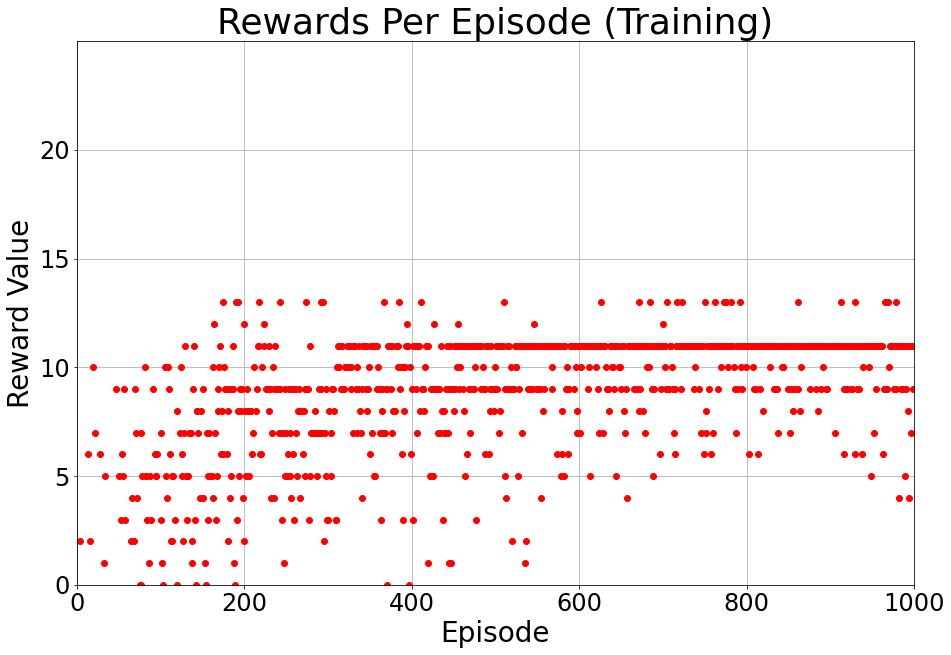

In [265]:
plt.figure(figsize=(15, 10))
plt.plot(total_rewards,'ro')
plt.xlabel('Episode', fontsize=28)
plt.ylabel('Reward Value', fontsize=28)
plt.title('Rewards Per Episode (Training)', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks([0,5,10,15,20], fontsize=24)
plt.ylim(ymin=0, ymax=25)
plt.xlim(xmin=0, xmax=1000)
plt.grid()
plt.show()

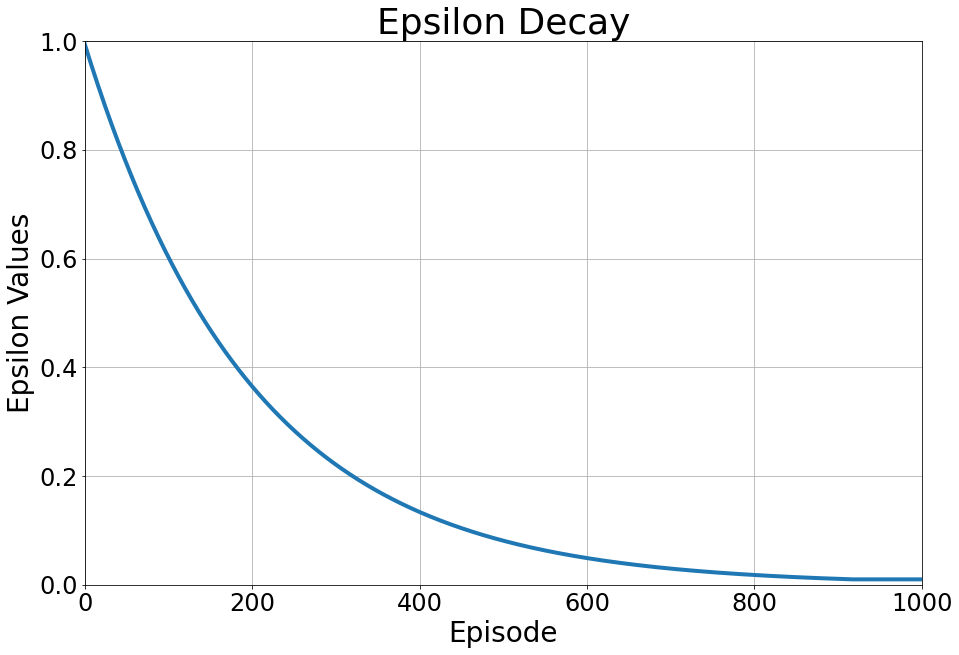

In [268]:
plt.figure(figsize=(15, 10))
plt.plot(epsilon_decay, linewidth=4)
plt.xlabel('Episode', fontsize=28)
plt.ylabel('Epsilon Values', fontsize=28)
plt.title('Epsilon Decay', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=1000)
plt.grid()
plt.show()

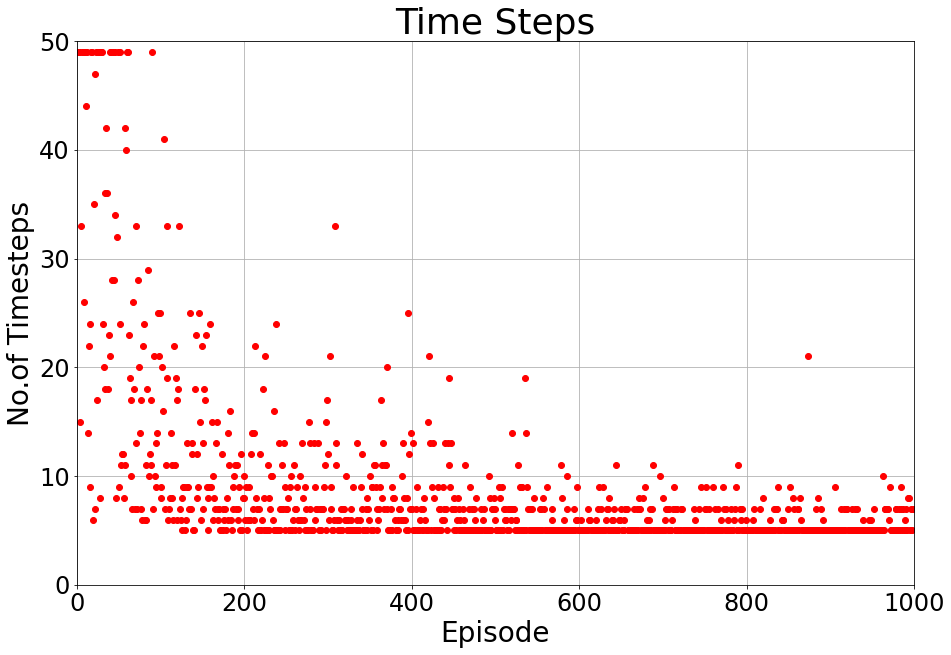

In [267]:
plt.figure(figsize=(15, 10))
plt.plot(time_steps_episode, 'ro')
plt.xlabel('Episode', fontsize=28)
plt.ylabel('No.of Timesteps', fontsize=28)
plt.title('Time Steps', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(ymin=0, ymax=50)
plt.xlim(xmin=0, xmax=1000)
plt.grid()
plt.show()

In [269]:
for e in range(10):
  observation_reset,info = env.reset()


  ind = observation_reset['agent']
  current_state = matrix[ind[0]][ind[1]]
  terminated, truncated = False, False 
  env.render(observation_reset)
  total_episode_reward = 0
  output.clear()
  i = 0
  print(".......episode.........",e)
  while not terminated:
    action = np.argmax(Q_table_stoch_sarsa[current_state,:])
    
    observation_state, reward, terminated, truncated, info = env.step(action)
    
    ind = observation_state['agent']
    next_state = matrix[ind[0],ind[1]]
    env.render(observation_state)
    current_state = next_state
    plt.pause(0.5)
    output.clear()

actual value 2
Change in value 0
time_step 3


KeyboardInterrupt: ignored

In [270]:
import pickle

In [271]:
pickle.dump(Q_table_deter_q,open("Q_table_deter_q.pkl","wb"))
pickle.dump(Q_table_deter_sarsa,open("Q_table_deter_sarsa.pkl","wb"))
pickle.dump(Q_table_stoch_q,open("Q_table_stoch_q.pkl","wb"))
pickle.dump(Q_table_stoch_sarsa,open("Q_table_stoch_sarsa.pkl","wb"))